In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
import random 
%matplotlib inline

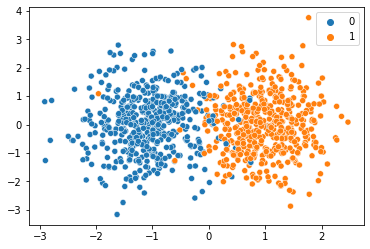

In [2]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1));

x_test=x[:500]
y_test=y[:500]
x=x[500:]
y=y[500:]

In [3]:
class decision_tree:
    def __init__(self,impurity="entropy",n_features=1):
        self.impurity=impurity
        self.n_features=n_features
        
    class node:
        def __init__(self,isleaf=False):
            self.isleaf=isleaf
            
    def __entropy(self,df):
        sum=0.
        n=df.shape[0]
        for i in df['o/p'].value_counts():
            sum-=np.log(i/n)
        return sum
    
    def __gini_impurity(self,df):
        sum=0.
        n=df.shape[0]
        for i in df['o/p'].value_counts():
            sum+=(i/n)**2
        return 1-sum
    
    def __information_gain(self,df,df1,df2):
        if(df1.shape[0]==0 or df2.shape[0]==0):
            return float("-inf")
        s=df.shape[0]
        sv1=df1.shape[0]
        sv2=df2.shape[0]
        h=0.
        h1=0.
        h2=0.
        if(self.impurity=='entropy'):
            h=self.__entropy(df)
            h1=self.__entropy(df1)
            h2=self.__entropy(df2)
        else:
            h=self.__gini_impurity(df)
            h1=self.__gini_impurity(df1)
            h2=self.__gini_impurity(df1)
        ig=h-sv1*h1/s-sv2*h2/s
        return ig
    
    def __fit_util(self,df,depth):
        impurity=0
        if(self.impurity=='entropy'):
            impurity=self.__entropy(df)
        else:
            impurity=self.__gini_impurity(df)
        if(impurity<=self.threshold_impurity or depth==self.max_depth):
            n=self.node(isleaf=True)
            n.classification=df['o/p'].mode()[0]
            return n
        max_ig=float('-inf')
        max_feature=df.columns[0]
        max_division=0
        features=list(df.columns)
        features.remove('o/p')
        for feature in random.sample(features,self.n_features):
            for division in df[feature].unique():
                df1=df[df[feature]<=division]
                df2=df[df[feature]>division]
                ig=self.__information_gain(df,df1,df2)
                if(ig>max_ig):
                    max_ig=ig
                    max_feature=feature
                    max_division=division
        df1=df[df[max_feature]<=max_division]
        df2=df[df[max_feature]>max_division]
        n=self.node()
        n.feature=max_feature
        n.division=max_division
        n.left=self.__fit_util(df1,depth+1)
        n.right=self.__fit_util(df2,depth+1)
        return n
        
    def fit(self,x,y,threshold_impurity=0.1,max_depth=100):
        assert x.shape[0]==y.shape[0],"Unequal length of Dataframes"
        df=pd.DataFrame(x)
        df['o/p']=pd.DataFrame(y)
        self.n=x.shape[0]
        self.max_depth=max_depth
        self.threshold_impurity=threshold_impurity
        self.tree=self.__fit_util(df,0)
        
    def __predict_util(self,n,df):
        if(n.isleaf):
            return n.classification
        if(df[n.feature]<=n.division):
            return self.__predict_util(n.left,df)
        else:
            return self.__predict_util(n.right,df)
    def predict(self,x):
        df=pd.DataFrame(x)
        n=df.shape[0]
        y=[]
        for i in range(n):
            y.append(self.__predict_util(self.tree,df.iloc[i,:]))
        return np.array(y)
            

In [4]:
model=decision_tree()
model.fit(x,y,threshold_impurity=0.1,max_depth=15)

In [5]:
prediction=model.predict(x_test)

In [6]:
print((len(y_test)-sum(abs(prediction-y_test)))/len(y_test))

0.924


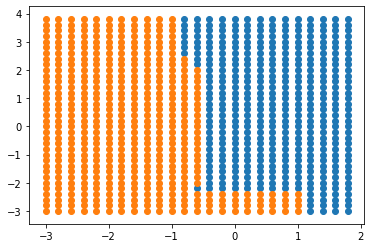

In [7]:
one1=[]
zero1=[]
one2=[]
zero2=[]
for i in np.arange(-3,2,0.2):
    for j in np.arange(-3,4,0.2):
        l=model.predict(np.array([[i,j]]))[0]
        if(l==1):
            one1.append(i)
            one2.append(j)
        else:
            zero1.append(i)
            zero2.append(j)
plt.scatter(np.array(one1),np.array(one2))
plt.scatter(np.array(zero1),np.array(zero2))